**Stock Market Prediction And Forecasting for AAPL**


```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/aapl_2014_2023.csv")
df.head(10)

In [ ]:
# @title high

from matplotlib import pyplot as plt
df['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail(5)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,185.398801,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,185.682801,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,185.971400,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,186.300001,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish
2515,2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,38.304340,51.061838,-76.639398,-82.668387,186.633801,188.942738,182.173301,184.681801,1.557975,194.308501,2.669998,2.396300,2.574645,bearish


In [ ]:
df1=df.reset_index()['close']
df1

0        19.754642
1        19.320715
2        19.426071
3        19.287144
4        19.409286
           ...    
2511    193.600006
2512    193.050003
2513    193.149994
2514    193.580002
2515    192.529999
Name: close, Length: 2516, dtype: float64

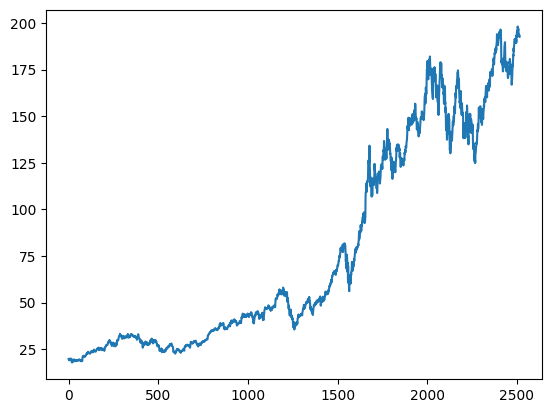

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
!pip install catboost

In [ ]:
#volume	rsi_7	rsi_14	cci_7	cci_14	sma_50	ema_50	sma_100	ema_100	macd	bollinger	TrueRange	atr_7	atr_14
def classify(row):
    if (row['rsi_7'] < 30 and row['rsi_14'] < 40 and
        row['macd'] < 0 and
        row['close'] < row['sma_50'] and row['close'] < row['sma_100'] and
        row['cci_7'] < -100 and row['cci_14'] < -100):
        return 'Bearish'
    elif (row['rsi_7'] > 70 and row['rsi_14'] > 60 and
          row['macd'] > 0 and
          row['close'] > row['sma_50'] and row['close'] > row['sma_100'] and
          row['cci_7'] > 100 and row['cci_14'] > 100):
        return 'Bullish'
    else:
        return 'Neutral'

# Apply classification function to each row
df['new_target'] = df.apply(classify, axis=1)
df

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target,new_target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,...,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish,Neutral
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,...,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish,Neutral
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,...,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish,Neutral
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,...,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish,Neutral
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,...,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,...,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral,Neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,...,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral,Neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,...,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral,Neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,...,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish,Neutral


In [ ]:
df['new_target'].value_counts()

new_target
Neutral    2120
Bullish     307
Bearish      89
Name: count, dtype: int64

In [ ]:
X=df.drop(['target','date'], axis=1)
y = df['target']

Calculating new macd and all values

In [ ]:
# RSI calculation
def calculate_rsi(data, period):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['New_RSI_7'] = calculate_rsi(df['close'], 7)
df['New_RSI_14'] = calculate_rsi(df['close'], 14)

# MACD calculation
def calculate_macd(data):
    ema_12 = data.ewm(span=12, min_periods=0, adjust=False).mean()
    ema_26 = data.ewm(span=26, min_periods=0, adjust=False).mean()
    macd_line = ema_12 - ema_26
    return macd_line

df['New_MACD'] = calculate_macd(df['close'])

# SMA calculation
df['New_SMA_50'] = df['close'].rolling(window=50).mean()
df['New_SMA_100'] = df['close'].rolling(window=100).mean()

# EMA calculation
df['New_EMA_50'] = df['close'].ewm(span=50, min_periods=0, adjust=False).mean()
df['New_EMA_100'] = df['close'].ewm(span=100, min_periods=0, adjust=False).mean()

# Bollinger Bands calculation
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

df['New_Upper_Band'], df['New_Lower_Band'] = calculate_bollinger_bands(df['close'])

# True Range calculation
df['New_TrueRange'] = np.maximum.reduce([df['high'] - df['low'], abs(df['high'] - df['close'].shift()), abs(df['low'] - df['close'].shift())])

# ATR calculation
df['New_ATR_7'] = df['New_TrueRange'].rolling(window=7).mean()
df['New_ATR_14'] = df['New_TrueRange'].rolling(window=14).mean()

# CCI calculation
def calculate_typical_price(high, low, close, open):
    return (high + low + close + open) / 4

def calculate_mean_deviation(data, period):
    sma_typical_price = data.rolling(window=period).mean()
    mean_deviation = (data - sma_typical_price).abs().rolling(window=period).mean()
    return mean_deviation

def calculate_cci(high, low, close, open, period):
    typical_price = calculate_typical_price(high, low, close, open)
    mean_deviation = calculate_mean_deviation(typical_price, period)
    cci = (typical_price - typical_price.rolling(window=period).mean()) / (0.015 * mean_deviation)
    return cci

df['New_CCI_7'] = calculate_cci(df['high'], df['low'], df['close'], df['open'], 7)
df['New_CCI_14'] = calculate_cci(df['high'], df['low'], df['close'], df['open'], 14)

df


,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,New_SMA_100,New_EMA_50,New_EMA_100,New_Upper_Band,New_Lower_Band,New_TrueRange,New_ATR_7,New_ATR_14,New_CCI_7,New_CCI_14
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,...,NaN,19.754642,19.754642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,...,NaN,19.737625,19.746049,NaN,NaN,0.473929,NaN,NaN,NaN,NaN
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,...,NaN,19.725407,19.739713,NaN,NaN,0.471428,NaN,NaN,NaN,NaN
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,...,NaN,19.708221,19.730751,NaN,NaN,0.287141,NaN,NaN,NaN,NaN
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,...,NaN,19.696498,19.724386,NaN,NaN,0.245355,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,...,181.768301,188.226229,183.982764,199.490535,187.846466,2.440003,2.567141,2.940713,-92.944236,-19.188947
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,...,181.787101,188.415396,184.162313,199.372064,188.290938,1.059997,2.224285,2.661427,-119.124341,-45.084020
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,...,181.898701,188.601067,184.340287,199.282852,188.655150,2.410004,2.368572,2.644285,-122.548875,-63.716403
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,...,182.046001,188.796319,184.523252,199.040519,189.318484,1.510010,2.130001,2.560715,-34.533548,-31.586132


In [ ]:
# Drop rows with NaN values
df.dropna(inplace=True)
df

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,New_SMA_100,New_EMA_50,New_EMA_100,New_Upper_Band,New_Lower_Band,New_TrueRange,New_ATR_7,New_ATR_14,New_CCI_7,New_CCI_14
99,2014-05-27,21.995714,22.352142,21.986786,22.343929,348866000,87.392878,78.584183,172.854902,181.486515,...,19.509343,20.397963,19.926655,22.064205,20.639866,0.418928,0.296836,0.279566,118.859298,154.337774
100,2014-05-28,22.357857,22.493929,22.277857,22.286072,315481600,83.070290,76.742558,130.211921,162.243129,...,19.534657,20.472007,19.973376,22.226638,20.590576,0.216072,0.265816,0.270612,98.662780,170.840594
101,2014-05-29,22.423214,22.745358,22.420357,22.692142,376474000,87.950421,80.242274,119.097134,169.923051,...,19.568371,20.559071,20.027213,22.471820,20.507144,0.459286,0.280408,0.282984,99.413722,173.635722
102,2014-05-30,22.785000,23.006071,22.460714,22.607143,564020800,82.166324,77.609677,97.486944,143.716042,...,19.600182,20.639388,20.078300,22.648405,20.478845,0.545357,0.329387,0.302397,87.929500,152.274106
103,2014-06-02,22.641430,22.672501,22.232143,22.451786,369350800,72.060767,72.901841,41.206265,89.874200,...,19.631829,20.710462,20.125300,22.764546,20.491526,0.440358,0.368622,0.313137,36.643905,97.973750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,...,181.768301,188.226229,183.982764,199.490535,187.846466,2.440003,2.567141,2.940713,-92.944236,-19.188947
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,...,181.787101,188.415396,184.162313,199.372064,188.290938,1.059997,2.224285,2.661427,-119.124341,-45.084020
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,...,181.898701,188.601067,184.340287,199.282852,188.655150,2.410004,2.368572,2.644285,-122.548875,-63.716403
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,...,182.046001,188.796319,184.523252,199.040519,189.318484,1.510010,2.130001,2.560715,-34.533548,-31.586132


In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'target', 'new_target',
       'New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14'],
      dtype='object')

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'target', 'new_target',
       'New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14'],
      dtype='object')

In [ ]:
##Calculating New target
def classify(row):
    if (row['New_RSI_7'] < 30 and row['New_RSI_14'] < 40 and
        row['New_MACD'] < 0 and
        row['close'] < row['New_SMA_50'] and row['close'] < row['New_SMA_100'] and
        row['New_CCI_7'] < -100 and row['New_CCI_14'] < -100):
        return 'Bearish'
    elif (row['New_RSI_7'] > 70 and row['New_RSI_14'] > 60 and
          row['New_MACD'] > 0 and
          row['close'] > row['New_SMA_50'] and row['close'] > row['New_SMA_100'] and
          row['New_CCI_7'] > 100 and row['New_CCI_14'] > 100):
        return 'Bullish'
    else:
        return 'Neutral'

# Apply classification function to each row
df['NEW_TARGET_DATA'] = df.apply(classify, axis=1)
df

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,New_EMA_50,New_EMA_100,New_Upper_Band,New_Lower_Band,New_TrueRange,New_ATR_7,New_ATR_14,New_CCI_7,New_CCI_14,NEW_TARGET_DATA
99,2014-05-27,21.995714,22.352142,21.986786,22.343929,348866000,87.392878,78.584183,172.854902,181.486515,...,20.397963,19.926655,22.064205,20.639866,0.418928,0.296836,0.279566,118.859298,154.337774,Bullish
100,2014-05-28,22.357857,22.493929,22.277857,22.286072,315481600,83.070290,76.742558,130.211921,162.243129,...,20.472007,19.973376,22.226638,20.590576,0.216072,0.265816,0.270612,98.662780,170.840594,Neutral
101,2014-05-29,22.423214,22.745358,22.420357,22.692142,376474000,87.950421,80.242274,119.097134,169.923051,...,20.559071,20.027213,22.471820,20.507144,0.459286,0.280408,0.282984,99.413722,173.635722,Neutral
102,2014-05-30,22.785000,23.006071,22.460714,22.607143,564020800,82.166324,77.609677,97.486944,143.716042,...,20.639388,20.078300,22.648405,20.478845,0.545357,0.329387,0.302397,87.929500,152.274106,Neutral
103,2014-06-02,22.641430,22.672501,22.232143,22.451786,369350800,72.060767,72.901841,41.206265,89.874200,...,20.710462,20.125300,22.764546,20.491526,0.440358,0.368622,0.313137,36.643905,97.973750,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,...,188.226229,183.982764,199.490535,187.846466,2.440003,2.567141,2.940713,-92.944236,-19.188947,Neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,...,188.415396,184.162313,199.372064,188.290938,1.059997,2.224285,2.661427,-119.124341,-45.084020,Neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,...,188.601067,184.340287,199.282852,188.655150,2.410004,2.368572,2.644285,-122.548875,-63.716403,Neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,...,188.796319,184.523252,199.040519,189.318484,1.510010,2.130001,2.560715,-34.533548,-31.586132,Neutral


Calculating New Target

In [ ]:
##Comparing all targets
df[['target','new_target','NEW_TARGET_DATA']]

,target,new_target,NEW_TARGET_DATA
99,neutral,Bullish,Bullish
100,bullish,Bullish,Neutral
101,neutral,Bullish,Neutral
102,bearish,Neutral,Neutral
103,bullish,Neutral,Neutral
...,...,...,...
2511,neutral,Neutral,Neutral
2512,neutral,Neutral,Neutral
2513,neutral,Neutral,Neutral
2514,bearish,Neutral,Neutral


Comparing all target columns

In [ ]:
print(df['target'].value_counts(),end='\n')
print(df['new_target'].value_counts(),end='\n')
print(df['NEW_TARGET_DATA'].value_counts(),end='\n')

target
bullish    917
bearish    752
neutral    748
Name: count, dtype: int64
new_target
Neutral    2031
Bullish     300
Bearish      86
Name: count, dtype: int64
NEW_TARGET_DATA
Neutral    2291
Bullish      86
Bearish      40
Name: count, dtype: int64


In [ ]:
##Using 'new_target' and new values
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Separate features and target variable
X = df.drop(['date','target','new_target',
       'New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14','NEW_TARGET_DATA'], axis=1)
y = df['new_target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Now you can use this trained model to predict classifications for new data
# For example:
# new_data = pd.DataFrame(...)
# predictions = clf.predict(new_data)


Classification Report:
              precision    recall  f1-score   support

     Bearish       0.89      0.80      0.84        20
     Bullish       0.97      1.00      0.98        65
     Neutral       0.99      0.99      0.99       399

    accuracy                           0.98       484
   macro avg       0.95      0.93      0.94       484
weighted avg       0.98      0.98      0.98       484



In [ ]:
##Using New data indicators and new target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Separate features and target variable
X = df.drop(['date', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'target', 'new_target',
       'NEW_TARGET_DATA'],axis=1)
y = df['NEW_TARGET_DATA']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

     Bearish       0.75      0.50      0.60         6
     Bullish       1.00      0.60      0.75        20
     Neutral       0.98      1.00      0.99       458

    accuracy                           0.98       484
   macro avg       0.91      0.70      0.78       484
weighted avg       0.97      0.98      0.97       484



In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV



import warnings

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

data=df[['open','high','low','close','volume','New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14','NEW_TARGET_DATA']]
X = data.drop(['NEW_TARGET_DATA'],axis=1)
y = data['NEW_TARGET_DATA']
#scaler
#using minmax scaler
print("Scaler using Minmax")
#data['NEW_TARGET_DATA'] = data['NEW_TARGET_DATA'].map({'Bearish': 3, 'Bullish': 2,"Neutral":1})
scaler = MinMaxScaler()
scaler_data= scaler.fit_transform(X)
scaled_mm = pd.DataFrame(scaler_data, columns=X.columns)
print(scaled_mm.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #balancing
print("Balancing with SMOTE")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())

#modeling
#knn
knn_model = KNeighborsClassifier()

#hpermeter for knn
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# GridSearchCV with knn
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_

# Naive Bayes model
nb_model = GaussianNB()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Random Forest modeli
rf_model = RandomForestClassifier()

# hipermeter for Random Forest
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

# GridSearchCV with Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluating the performance of each model
knn_pred = best_knn_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)

nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Evaluating the performance of each model
knn_recall = recall_score(y_test, knn_pred)
print("KNN accuracy",knn_accuracy,"KNN recall",knn_recall)
nb_recall = recall_score(y_test, nb_pred)
print("nb_accuracy",nb_accuracy,"nb_recall",nb_recall)
rf_recall = recall_score(y_test, rf_pred)
print("rf_accuracy",rf_accuracy,"rf_recall",rf_recall)


# choose best model
best_model = None
best_accuracy = 0
best_metric = 0


print("Best model acc scor:", best_accuracy)
print("Best model's", best_metric_name, "score:", best_metric)
print("Best model:", best_model)

In [ ]:
df[['open','high','low','close','volume','New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14','NEW_TARGET_DATA']]

,open,high,low,close,volume,New_RSI_7,New_RSI_14,New_MACD,New_SMA_50,New_SMA_100,New_EMA_50,New_EMA_100,New_Upper_Band,New_Lower_Band,New_TrueRange,New_ATR_7,New_ATR_14,New_CCI_7,New_CCI_14,NEW_TARGET_DATA
99,21.995714,22.352142,21.986786,22.343929,348866000,100.000000,76.430734,0.555995,20.016621,19.509343,20.397963,19.926655,22.064205,20.639866,0.418928,0.296836,0.279566,118.859298,154.337774,Bullish
100,22.357857,22.493929,22.277857,22.286072,315481600,94.552805,77.030791,0.573075,20.086100,19.534657,20.472007,19.973376,22.226638,20.590576,0.216072,0.265816,0.270612,98.662780,170.840594,Neutral
101,22.423214,22.745358,22.420357,22.692142,376474000,95.239498,86.103950,0.612320,20.160371,19.568371,20.559071,20.027213,22.471820,20.507144,0.459286,0.280408,0.282984,99.413722,173.635722,Neutral
102,22.785000,23.006071,22.460714,22.607143,564020800,88.977747,86.195885,0.629309,20.233043,19.600182,20.639388,20.078300,22.648405,20.478845,0.545357,0.329387,0.302397,87.929500,152.274106,Neutral
103,22.641430,22.672501,22.232143,22.451786,369350800,78.611731,78.601116,0.623054,20.304436,19.631829,20.710462,20.125300,22.764546,20.491526,0.440358,0.368622,0.313137,36.643905,97.973750,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,195.179993,195.410004,192.970001,193.600006,37122800,17.751448,59.246141,2.636317,185.398801,181.768301,188.226229,183.982764,199.490535,187.846466,2.440003,2.567141,2.940713,-92.944236,-19.188947,Neutral
2512,193.610001,193.889999,192.830002,193.050003,28919300,14.664838,49.031934,2.306308,185.682801,181.787101,188.415396,184.162313,199.372064,188.290938,1.059997,2.224285,2.661427,-119.124341,-45.084020,Neutral
2513,192.490005,193.500000,191.089996,193.149994,48087700,17.113003,52.291514,2.029448,185.971400,181.898701,188.601067,184.340287,199.282852,188.655150,2.410004,2.368572,2.644285,-122.548875,-63.716403,Neutral
2514,194.139999,194.660004,193.169998,193.580002,34049900,28.884858,47.920431,1.823710,186.300001,182.046001,188.796319,184.523252,199.040519,189.318484,1.510010,2.130001,2.560715,-34.533548,-31.586132,Neutral


In [ ]:
data=df[['open','high','low','close','volume','New_RSI_7', 'New_RSI_14', 'New_MACD', 'New_SMA_50', 'New_SMA_100',
       'New_EMA_50', 'New_EMA_100', 'New_Upper_Band', 'New_Lower_Band',
       'New_TrueRange', 'New_ATR_7', 'New_ATR_14', 'New_CCI_7', 'New_CCI_14','NEW_TARGET_DATA']]
X = data.drop(['NEW_TARGET_DATA'],axis=1)
y = data['NEW_TARGET_DATA']

# Model 1 SVC




In [ ]:
from statistics import mean, stdev
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.api import GLM, add_constant
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.svm import SVC
svc_lin=SVC(kernel='poly')
svc_bagging=BaggingClassifier(base_estimator=svc_lin, n_estimators=10)
clf_list=[svc_lin,svc_bagging ]; label=['SVC', 'SVCbagging']
for clf, label  in zip(clf_list, label ):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

Accuracy:   (0.9479, 0.001, 'SVC')
Accuracy:   (0.9479, 0.001, 'SVCbagging')


In [ ]:
Accuracy=[]
ker=['poly', 'rbf', 'sigmoid']
for i in ker:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  model = SVC(kernel=i)
  model.fit(X_train, y_train)
  pred_svc = model.predict(X_test)
  accuracyOfModel=accuracy_score(y_test, pred_svc)
  Accuracy.append(accuracyOfModel)


print(Accuracy)

[0.9504132231404959, 0.9490358126721763, 0.9559228650137741]


# Gradient Boosting Models (GBM)

*   List item
*   List item



In [ ]:
# Assuming 'y' contains the categorical target variable
# Encode the categorical labels into numeric values
print("Gradient boosting")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now 'y_encoded' contains numeric labels suitable for XGBoost


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Gradient boosting
Accuracy: 0.981404958677686
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.84      0.80      0.82        20
           2       0.99      0.99      0.99       458

    accuracy                           0.98       484
   macro avg       0.86      0.93      0.89       484
weighted avg       0.98      0.98      0.98       484



#Model 2 Bagging Approch using naive Bayse ,Decision Tree and random Forest



In [ ]:
bagging_1 = DecisionTreeClassifier(criterion='entropy')
bagging_2 = GaussianNB()

# bagging learner 1
bagging1 = BaggingClassifier(base_estimator=bagging_1, n_estimators=10, max_samples=0.8, max_features=0.8)
# bagging learner 2
bagging2 = BaggingClassifier(base_estimator=bagging_2, n_estimators=10, max_samples=0.8, max_features=0.8)
# Random Forest
RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF

In [ ]:
label = ['Bagging Tree','Bagging NB','rf']
clf_list = [bagging1, bagging2,RF]


for clf, label  in zip(clf_list, label ):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

Accuracy:   (0.9694, 0.005, 'Bagging Tree')
Accuracy:   (0.9268, 0.03, 'Bagging NB')
Accuracy:   (0.7502, 0.306, 'rf')


#USING LDA FOR MODELING AND TIME CALCULATION

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import pandas as pd
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning
df=pd.DataFrame(X_lda)
df.columns=['LDA1','LDA2']
df.head()

In [ ]:
lda_model.explained_variance_ratio_

array([0.78260364, 0.21739636])

In [ ]:
#Using SVC with two Input
from sklearn.svm import SVC
import time
start=time. time()
Accuracy=[]
ker=['poly', 'rbf', 'sigmoid']
for i in ker:
  X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.3)
  model = SVC(kernel=i)
  model.fit(X_train, y_train)
  pred_svc = model.predict(X_test)
  accuracyOfModel=accuracy_score(y_test, pred_svc)
  Accuracy.append(accuracyOfModel)

print(Accuracy)
end = time. time()
print(end-start)

[0.9545454545454546, 0.9573002754820936, 0.9228650137741047]
0.1659238338470459


In [ ]:
#Creating Function for training and Calculate Accuracy

def training_and_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
#

In [ ]:
#Creating Function for training and Calculate Accuracy

def training_and_accuracy(model, X,y,k):
  scores = cross_val_score(model,X,y,cv = k)
  accuracy = mean(scores)



    return accuracy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#usnig Bagging ,Boosting ,Stackning to get the accuracy and calculate time with 10 MC run
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,AdaBoostClassifier,StackingClassifier

start = time.time()

bagging = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=100)
boosting = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=100)
stacking = StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                           ('svc', SVC()),
                                           ('nb', GaussianNB())], final_estimator=LogisticRegression())

MC = 10

# Initialize lists to store accuracies
bagging_accuracies = []
boosting_accuracies = []

stacking_accuracies = []

# Perform Monte Carlo runs
for i in range(MC):
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=i)

    # Bagging
    bagging_accuracy = training_and_accuracy(bagging, X_train, X_test, y_train, y_test)
    bagging_accuracies.append(bagging_accuracy)
    bag = max(bagging_accuracies)

    # Boosting
    boosting_accuracy = training_and_accuracy(boosting, X_train, X_test, y_train, y_test)
    boosting_accuracies.append(boosting_accuracy)
    boo = max(boosting_accuracies)

    # Stacking
    stacking_accuracy = training_and_accuracy(stacking, X_train, X_test, y_train, y_test)
    stacking_accuracies.append(stacking_accuracy)
    sta= max(stacking_accuracies)



end = time.time()

print(end-start)
print(bag,boo,sta)

28.450387954711914
0.96900826446281 0.8161157024793388 0.96900826446281
